# NOAA GLERL Webcam Alignment  
This notebook is stored on my laptop in /njc/src/SSF  
It contains code used to learn how to align images from **View \#1 of NOAA GLERL Michigan City Webcam**

## Loading an image using matplotlib 
Using the matplotlib python library to load an image into a jupyter notebook.

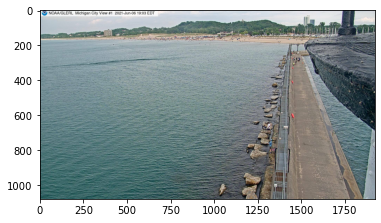

In [1]:
import matplotlib.pyplot as plt                      # import matplotlib 
img1 = plt.imread('MC20210606_2303_01_1903edt.jpg')  # define variable for image
plt.imshow(img1)                                     # display image

## Loading and converting the image into grayscale using PIL and matplot lib
Working with grayscale images can make it easier to align them.

2


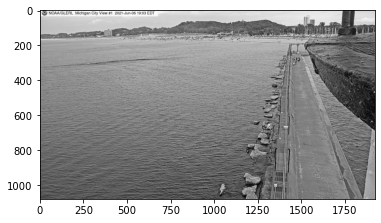

In [21]:
import matplotlib.pyplot as plt                       # import matplotlib 
from PIL import Image                                 # import tools from PIl
img = Image.open("MC20210606_2303_01_1903edt.jpg")    # open the color image
gray = img.convert('L')                               # convert image to black and white
print (len(np.shape(gray)))                           # Check if the array is 2D               
gray.show()                                           # display image in viewer using PIL
plt.imshow(gray,cmap='gray')                          # display image in notebook and force matplotlib to show in grayscale

## Loading and converting the image into grayscale using only matplotlib

In [ ]:
import matplotlib.pyplot as plt                       # import matplotlib 
import numpy as np                                    # importing NumPy

img1 = plt.imread('MC20210606_2303_01_1903edt.jpg')   # define variable for image
print (np.shape(img1))
gray2 = np.mean(img1, -1) # Getting the arithmatic average of the image along the last axis 
#plt.subplot(311)
#plt.imshow(img1[:,:,0], cmap = 'gray')
#plt.subplot(312)
#plt.imshow(img1[:,:,1], cmap = 'gray')
#plt.subplot(313)
#plt.imshow(img1[:,:,2], cmap = 'gray')
plt.imshow(gray-gray2, cmap = 'gray')     # displaying the image using a gray colormap

using wgt


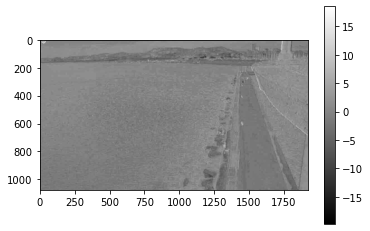

In [4]:
def rgb2gray (a, method = "avg"):
    s = np.shape(a)
    bw = np.zeros((s[0],s[1]))
    if method == "avg":
        w = np.array((1,1,1))/3.
        print ('using avg')
    elif method == "wgt":
        w = np.array((0.299,0.587,0.114))
        print('using wgt')
    else: 
        w = np.array((1,1,1))/3.  
        print ("defaulting to wgt")
    bw = a[:,:,0]*w[0]+a[:,:,1]*w[1]+a[:,:,2]*w[2]
    return bw

bw = rgb2gray(img1,"wgt")
plt.imshow(gray2-bw, cmap = 'gray')
plt.colorbar()

## Alignment Quiz (Answer reveal on Monday 06/14/2021!)
### Goals:  
* Write a function that will return an error metric so I can assess the differenes between the two images before and after I try to align them.
* Align two imagaes to a base reference image (one image is a shifted version of the refernece, the other is a different picture of the same view but from a different time)
    * Manually translate the images to align them until error metric is negligible. 
    * Write code that will automate the manual process using cross-correlation.   

Here is a link to a stack overflow page that had a lot of really useful examples for how to [compare two images](https://stackoverflow.com/questions/189943/how-can-i-quantify-difference-between-two-images)  
This stack overflow page is also helpful in doing manual image translation with a [translation matrix](https://stackoverflow.com/questions/54274185/shifting-an-image-by-x-pixels-to-left-while-maintaining-the-original-shape/54274222)

### Practice Code

using wgt
using wgt


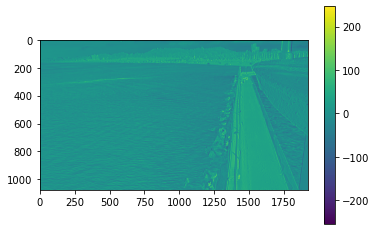

In [5]:
i1 = plt.imread("MC20210606_2233_01_1833edt.jpg")
i2 = plt.imread("MC20210606_2303_01_1903edt.jpg")

bw1= rgb2gray(i1, "wgt")
bw2= rgb2gray(i2, "wgt")
diff = bw1-bw2
plt.imshow(diff)
plt.colorbar()

In [6]:
from PIL import Image
from PIL import ImageChops

im1 = Image.open("MC20210606_2233_01_1833edt.jpg")
im2 = Image.open("MC20210606_2303_01_1903edt.jpg")

diff = ImageChops.difference(im2, im1)
diff.getbbox()
print (im1.size)

(1920, 1080)


### Function that returns the norm of the elementwise difference of two arrays as an error metric

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def imgarray_dif(img1, img2):
    # read images
    img1 = plt.imread(img1)
    img2 = plt.imread(img2)
    # convert images into 2D grayscale arrays
    img1 = rgb2gray(img1, "wgt") 
    img2 = rgb2gray(img2, "wgt")
    # compare the arrays
    # Manhatten Norm
    m_norm = sum( abs(img1-img2) ) / img1.size
    # Normalized Cross-Correlation [wikipedia page on formulas](https://en.wikipedia.org/wiki/Cross-correlation#Normalized_cross-correlation)
    cc_norm = sum( (img1 - np.mean(img1)) * (img2 - np.mean(img2)) ) / ((img1.size - 1) * np.std(img1) * np.std(img2) )
    # show values
    return (print(m_norm, cc_norm))

    
    
    
    

In [8]:
imgarray_dif("MC20210606_2233_01_1833edt.jpg","MC20210606_2303_01_1903edt.jpg")

using wgt
using wgt
[0.00759004 0.0071034  0.00701865 ... 0.01117422 0.00969591 0.01005465] [0.00034134 0.00034385 0.00034637 ... 0.0009272  0.00095418 0.00095846]


In [9]:
import sys

from scipy import misc
from scipy.linalg import norm
from scipy import sum, average

In [10]:
def to_grayscale(arr):
    "If arr is a color image (3D array), convert it to grayscale (2D array)."
    if len(arr.shape) == 3:
        return average(arr, -1)  # average over the last axis (color channels)
    else:
        return arr

In [11]:
def compare_images(img1, img2):
    # calculate the difference and its norms
    diff = img1 - img2  # elementwise for scipy arrays
    m_norm = sum(abs(diff))  # Manhattan norm
    z_norm = norm(diff.ravel(), 0)  # Zero norm
    return (m_norm, z_norm)

In [12]:
def main(file1, file2):
    file1, file2 = sys.argv[1:1+2]
    # read images as 2D arrays (convert to grayscale for simplicity)
    img1 = to_grayscale(misc.imread(file1).astype(float))
    img2 = to_grayscale(misc.imread(file2).astype(float))
    # compare
    n_m, n_0 = compare_images(img1, img2)
    print ("Manhattan norm:", n_m, "/ per pixel:", n_m/img1.size)
    print ("Zero norm:", n_0, "/ per pixel:", n_0*1.0/img1.size)

In [13]:
main("MC20210606_2233_01_1833edt.jpg","MC20210606_2303_01_1903edt.jpg")

AttributeError: module 'scipy.misc' has no attribute 'imread'

### Function to display images

In [ ]:
import numpy as np                                               #import libraries
import matplotlib.pyplot as plt
from PIL import Image 
import matplotlib.image as mpimg
from glob import glob

def plot_album(album_name):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    # this assumes the images are in images_dir/album_name/<name>.jpg
    image_paths = glob("imgname" + '/*.jpg')
    for imp, ax in zip(image_paths, axes.ravel()):
        img = mpimg.imread(imp)
        ax.imshow(img)
        ax.axis('off')
    fig.tight_layout()
    
